In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

from pathlib import Path

# Define global style of the plt for all graphs
# /!\ Note that using BOTH style is important (in this order)
plt.style.use("seaborn-v0_8-dark")
plt.style.use("dark_background")
plt.rcParams['axes.facecolor'] = "#444445" # "#444445" # darker is "#262421"
plt.rcParams["figure.facecolor"] = "#333" #"#333" # "#darker is "#161612"
plt.rcParams["grid.color"] = "#fff"
plt.rcParams["grid.linestyle"] = "-."
plt.rcParams["grid.linewidth"] = 0.2
plt.rcParams["axes.grid"] = True
plt.rcParams["savefig.dpi"] = 400
plt.rcParams["savefig.facecolor"] = "auto"
DFT_HEIGHT = 4.8 # inches
DFT_WIDTH = 6.4 # inches

In [2]:
df = pd.read_csv("stats.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
df

,broadcasts,officials
date,,
2017-10-07,1,1
2017-10-08,6,6
2017-10-09,7,7
2017-10-10,10,10
2017-10-11,10,10
...,...,...
2024-12-06,136,67
2024-12-07,177,67
2024-12-08,123,54


<Axes: xlabel='date'>

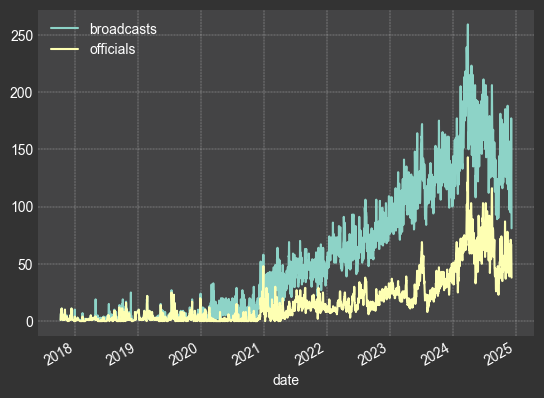

In [3]:
end = df.index.searchsorted(dt.datetime(2024, 12, 10))
df.iloc[:end].plot()

<Axes: xlabel='date'>

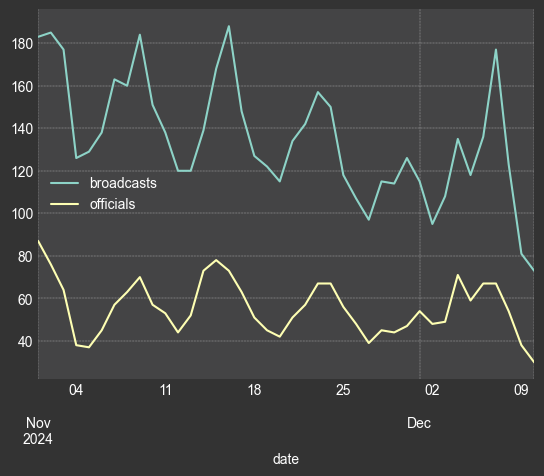

In [5]:
year = 2024
start = df.index.searchsorted(dt.datetime(year, 11, 1))
end = df.index.searchsorted(dt.datetime(year, 12, 30))
df.iloc[start:end].plot()

In [7]:
window_size = 30
broadcast = df['broadcasts'].rolling(window=window_size).mean().dropna()
officials = df['officials'].rolling(window=window_size).mean().dropna()
officials

date
2017-11-13     4.300000
2017-11-14     4.300000
2017-11-16     4.100000
2017-11-20     3.933333
2017-11-21     3.666667
                ...    
2024-12-06    56.333333
2024-12-07    56.666667
2024-12-08    56.366667
2024-12-09    55.300000
2024-12-10    54.400000
Name: officials, Length: 2377, dtype: float64

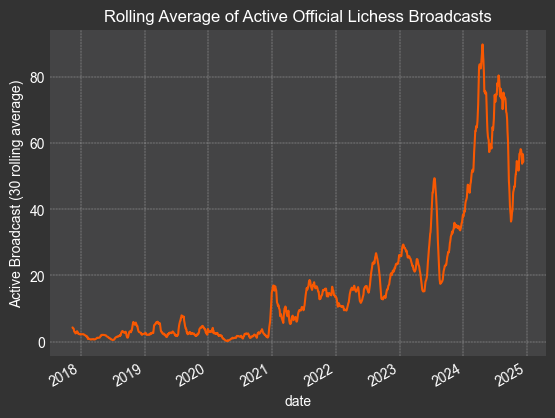

In [8]:
title = "Rolling Average of Active Official Lichess Broadcasts"
y_label = f"Active Broadcast ({window_size} days rolling average)"
ax = officials.plot(color = ["#f75802"],title=title,ylabel=y_label) #c64b07 lichess, #d8540d ligther, #f75802 even lighter
#ax.set_title(title)
#ax.set_ylabel(y_label)
plt.savefig("official_all_time.png",bbox_inches='tight',dpi=300)
# all color#57aeff 

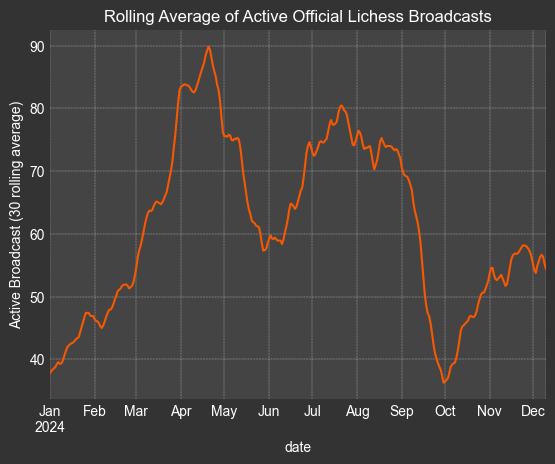

In [9]:
start = officials.index.searchsorted(dt.datetime(2024, 1, 1))
officials_2024 = officials.iloc[start:]
ax = officials_2024.plot(color = ["#f75802"],title=title,ylabel=y_label)
plt.savefig("official_2024.png",bbox_inches='tight',dpi=300)

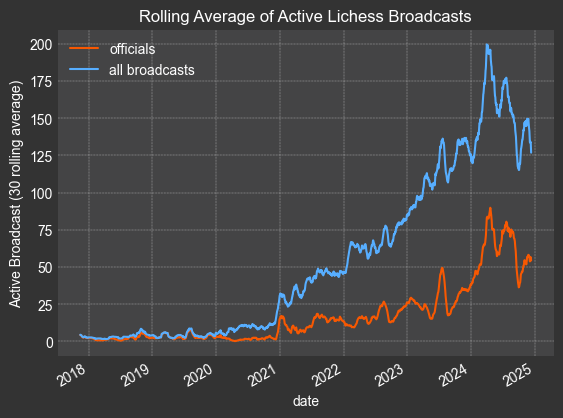

In [10]:
rr = officials.to_frame()
rr["all broadcasts"] = broadcast
title = "Rolling Average of Active Lichess Broadcasts"
ax = rr.plot(color = ["#f75802", "#57aeff"],title=title,ylabel=y_label)
plt.savefig("all_all_time.png",bbox_inches='tight',dpi=300)